In [1]:
# 3. Import libraries and modules
import numpy as np
np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, Conv2D,BatchNormalization
from keras.utils import np_utils
from keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from tensorflow.python.keras import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Conv2D,BatchNormalization, Dense, Dropout, Activation, Flatten
from sklearn.metrics import accuracy_score

from tensorflow import keras 
import tensorflow as tf

/Users/davidvalensi/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [13]:

#from google.colab import drive
#drive.mount('/content/drive')

# read images data
def imageDataFormat(imagesfile):
    imagesData = np.load(imagesfile, encoding='latin1')[:, 1]   
    image_train = np.zeros((len(imagesData), len(imagesData[0])))
    for i in range(len(imagesData)):
        image_train[i] = imagesData[i]
    return image_train

train_images = imageDataFormat('./all/train_images.npy')
test_images = imageDataFormat('./all/test_images.npy')

#train_images = imageDataFormat('/content/drive/My Drive/Colab Notebooks/train_images.npy')
#test_images= imageDataFormat('/content/drive/My Drive/Colab Notebooks/test_images.npy')
print(train_images.shape, test_images.shape)

(10000, 10000) (10000, 10000)


In [33]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

#train_labels = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train_labels.csv',sep = ',',usecols = [1])
train_labels = pd.read_csv('./all/train_labels.csv',sep = ',',usecols = [1])

encoder = LabelEncoder()
encoder.fit(train_labels['Category'])
y_train = encoder.transform(train_labels['Category'])
y_train = to_categorical(y_train,31)

In [8]:
y_train.shape

(10000, 31)

In [22]:
def center_of_image(image):
    M = cv2.moments(image)
    midX = int(M["m10"] / M["m00"]) 
    midY = int(M["m01"] / M["m00"])
    rows,cols = image.shape
    dim = (cols,rows)
    centerM = np.float32([[1,0,(rows/2)-midX],[0,1,(cols/2)-midY]])
    image = cv2.warpAffine(image,centerM,dim)
    return image

def preprocess_image2(img):
    img = np.uint8(img.reshape(100,100))
    Canvas = np.zeros(img.shape)
    ret, thresh = cv2.threshold(img, 127, 255, 0)
    im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) != 0:
            contours = max(contours, key=cv2.contourArea)
            contourImage = cv2.drawContours(Canvas, [contours], -1, 255, -1)
            clean = img * contourImage
            clean = center_of_image(clean)
            return clean.ravel()    
        
X=[]
for i in range(train_images.shape[0]):
    X.append(preprocess_image2(train_images[i]).reshape(100,100))
X= np.array(X)

X_test=[]
for i in range(test_images.shape[0]):
    X_test.append(preprocess_image2(test_images[i]).reshape(100,100))
X_test= np.array(X_test)
print(X_test.shape)


(10000, 100, 100)


(9000, 100, 100)
(9000, 1, 100, 100) (9000, 31) (1000, 1, 100, 100)


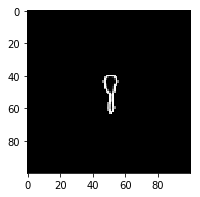

In [30]:
# 4. Load data into train and test sets
X_train = X[:9000]
X_test = X[9000:]
print(X_train.shape)

plt.figure(figsize=(3, 3))
plt.imshow(X_train[4], cmap='gray')
# 5. Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 1, 100, 100)
X_test = X_test.reshape(X_test.shape[0], 1, 100, 100)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
 
# 6. Preprocess class labels
Y_train = y_train[:9000]
Y_test = y_train[9000:]

print(X_train.shape, Y_train.shape, X_test.shape)

In [31]:

def build_model_cnn():
    model = Sequential()

    
    #model.add(BatchNormalization(axis=3))
    model.add(Conv2D(32, (3, 3), activation='relu', data_format="channels_first", input_shape=(1,100,100)))  #changed now from 32 to 128 kernel size
    model.add(BatchNormalization(axis=3))
    model.add(Conv2D(filters=32, kernel_size=3, padding='Same', activation='relu'))
    model.add(BatchNormalization(axis=3))
    model.add(Conv2D(filters=32, kernel_size=5, padding='Same', activation='relu'))
    model.add(BatchNormalization(axis=3))
    model.add(Conv2D(filters=32, kernel_size=5, padding='Same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(BatchNormalization(axis=3))
    model.add(Conv2D(filters=32, kernel_size=3, padding='Same', activation='relu'))
    model.add(BatchNormalization(axis=3))
    model.add(Conv2D(filters=32, kernel_size=3, padding='Same', activation='relu'))
    model.add(BatchNormalization(axis=3))
    model.add(Conv2D(filters=32, kernel_size=5, padding='Same', activation='relu'))
    model.add(BatchNormalization(axis=3))
    model.add(Conv2D(filters=32, kernel_size=5, padding='Same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(BatchNormalization(axis=3))
    model.add(Conv2D(filters=32, kernel_size=3, padding='Same', activation='relu'))
    model.add(BatchNormalization(axis=3))
    model.add(Conv2D(filters=32, kernel_size=3, padding='Same', activation='relu'))
    model.add(BatchNormalization(axis=3))
    model.add(Conv2D(filters=32, kernel_size=5, padding='Same', activation='relu'))
    model.add(BatchNormalization(axis=3))
    model.add(Conv2D(filters=32, kernel_size=5, padding='Same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(31, activation='softmax'))

    
    return model
 
model = build_model_cnn()

# 8. Compile model
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])


from keras.preprocessing.image import ImageDataGenerator
# With data augmentation to prevent overfitting
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=30)

datagen.fit(X_train)

/Users/davidvalensi/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image.py:1213: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (9000, 1, 100, 100) (100 channels).
  ' channels).')


In [0]:
batch_size=32
epochs=25

# 9. Fit model on training data
#model.fit(X_train, Y_train,   batch_size=batch_size, epochs=epochs, verbose=1)
 
 # Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs,
                              verbose = 1, steps_per_epoch=300)
model.save('/content/drive/My Drive/Colab Notebooks/model1.h5')
# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0)

print(score)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image.py:1643: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (9000, 1, 100, 100) (100 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


Epoch 1/25
300/300 [==============================] - 48s 161ms/step - loss: 2.6743 - acc: 0.2266
Epoch 2/25
300/300 [==============================] - 41s 136ms/step - loss: 2.0852 - acc: 0.3772
Epoch 3/25
300/300 [==============================] - 41s 138ms/step - loss: 1.8537 - acc: 0.4530
Epoch 4/25
300/300 [==============================] - 41s 137ms/step - loss: 1.6945 - acc: 0.4961
Epoch 5/25
300/300 [==============================] - 41s 137ms/step - loss: 1.6107 - acc: 0.5221
Epoch 6/25
300/300 [==============================] - 41s 137ms/step - loss: 1.5460 - acc: 0.5405
Epoch 7/25
300/300 [==============================] - 41s 137ms/step - loss: 1.4555 - acc: 0.5679
Epoch 8/25
300/300 [==============================] - 41s 137ms/step - loss: 1.3992 - acc: 0.5850
Epoch 9/25
300/300 [==============================] - 41s 138ms/step - loss: 1.3311 - acc: 0.6017
Epoch 10/25
300/300 [==============================] - 41s 137ms/step - loss: 1.3049 - acc: 0.6046
Epoch 11/25
300/300

In [ ]:
from keras.models import load_model
import csv

#model = load_model('/content/drive/My Drive/Colab Notebooks/model1.h5')
print(X_test.shape)
pred_prob =model.predict(X_test)
y_classes = pred_prob.argmax(axis=-1)
pred = encoder.inverse_transform(y_classes)


pred = np.array(pred)
print (len(pred))
'''
with open('/content/drive/My Drive/Colab Notebooks/label_test.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, quoting=csv.QUOTE_MINIMAL)
    writer.writerow(['Id', 'Category'])
    for i in range (len(pred)):
        writer.writerow([str(i)] + [pred[i]])
'''
accuracy_score(train_labels[9000:], pred)
